# Churn Analysis :->

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("Customer_Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Replacing blanks with 0 as tenure is 0 and no total charges are recorded. And also converting 'TotalCharges' from object to float.

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df['customerID'].duplicated().sum()

0

##### converting 0 and 1's from column 'SeniorCitizen' to 'yes' and 'no'.

In [57]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

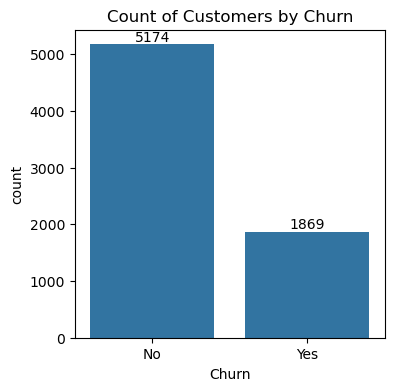

In [45]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x=df['Churn'])

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

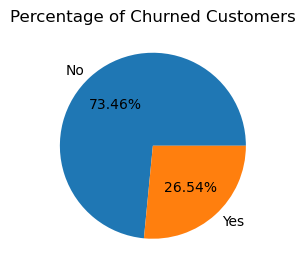

In [42]:
gb = df.groupby('Churn').agg({'Churn' : 'count'})

plt.figure(figsize=(3,4))
plt.pie(gb['Churn'], autopct="%1.2f%%", labels=gb.index)
plt.title("Percentage of Churned Customers")
plt.show()

##### from the given pie chart we can conclude that 26.54% of our customers have churned out.
##### Now, let's explore the reason behind it.

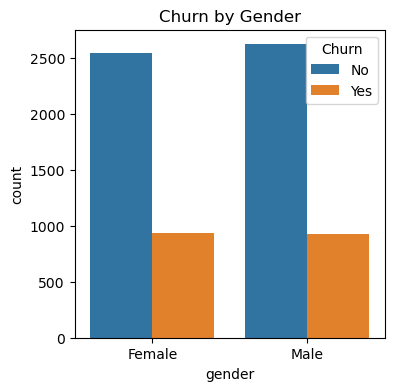

In [46]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Churn by Gender")
plt.show()

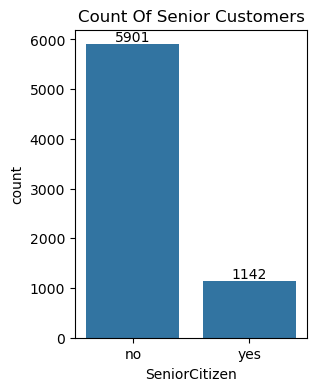

In [80]:
plt.figure(figsize=(3,4))
ax2 = sns.countplot(data=df, x="SeniorCitizen")
ax2.bar_label(ax2.containers[0])
plt.title("Count Of Senior Customers")
plt.show()

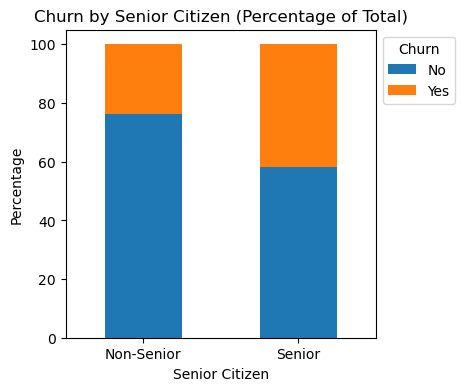

In [81]:
# Calculate the count of 'Churn' for each 'SeniorCitizen' group
counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Pivot the data so that 'Churn' values are separate columns
pivot_counts = counts.pivot_table(index='SeniorCitizen', columns='Churn', values='Count', aggfunc='sum', fill_value=0)

# Calculate the percentages for each 'SeniorCitizen' group
pivot_percentages = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
pivot_percentages.plot(kind='bar', stacked=True, figsize=(4,4))

plt.title("Churn by Senior Citizen (Percentage of Total)")
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Non-Senior', 'Senior'], rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1,1))

plt.show()

##### Comparatively a greater percentage of people in senior citizen category have Churned.

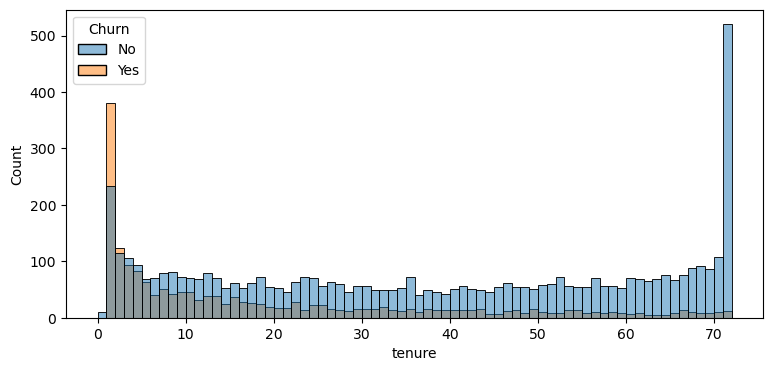

In [89]:
plt.figure(figsize=(9,4))
sns.histplot(data=df, x="tenure", bins=72, hue="Churn")
plt.show()

##### People who have used services for long time have stayed and People who have used services for 1 or 2 months have Churned.

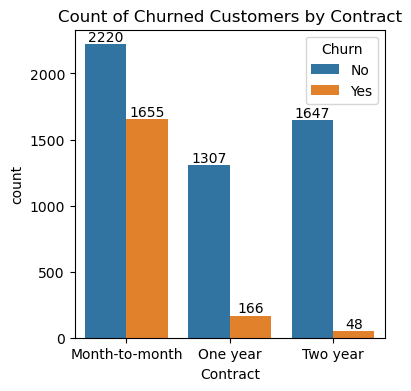

In [107]:
plt.figure(figsize=(4,4))
ax3 = sns.countplot(data=df, x='Contract', hue="Churn")
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
plt.title("Count of Churned Customers by Contract")
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1,1))
plt.show()

##### People who have month-to-month contract are likely to churn then from those who have 1 or 2 years of contract.

In [98]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

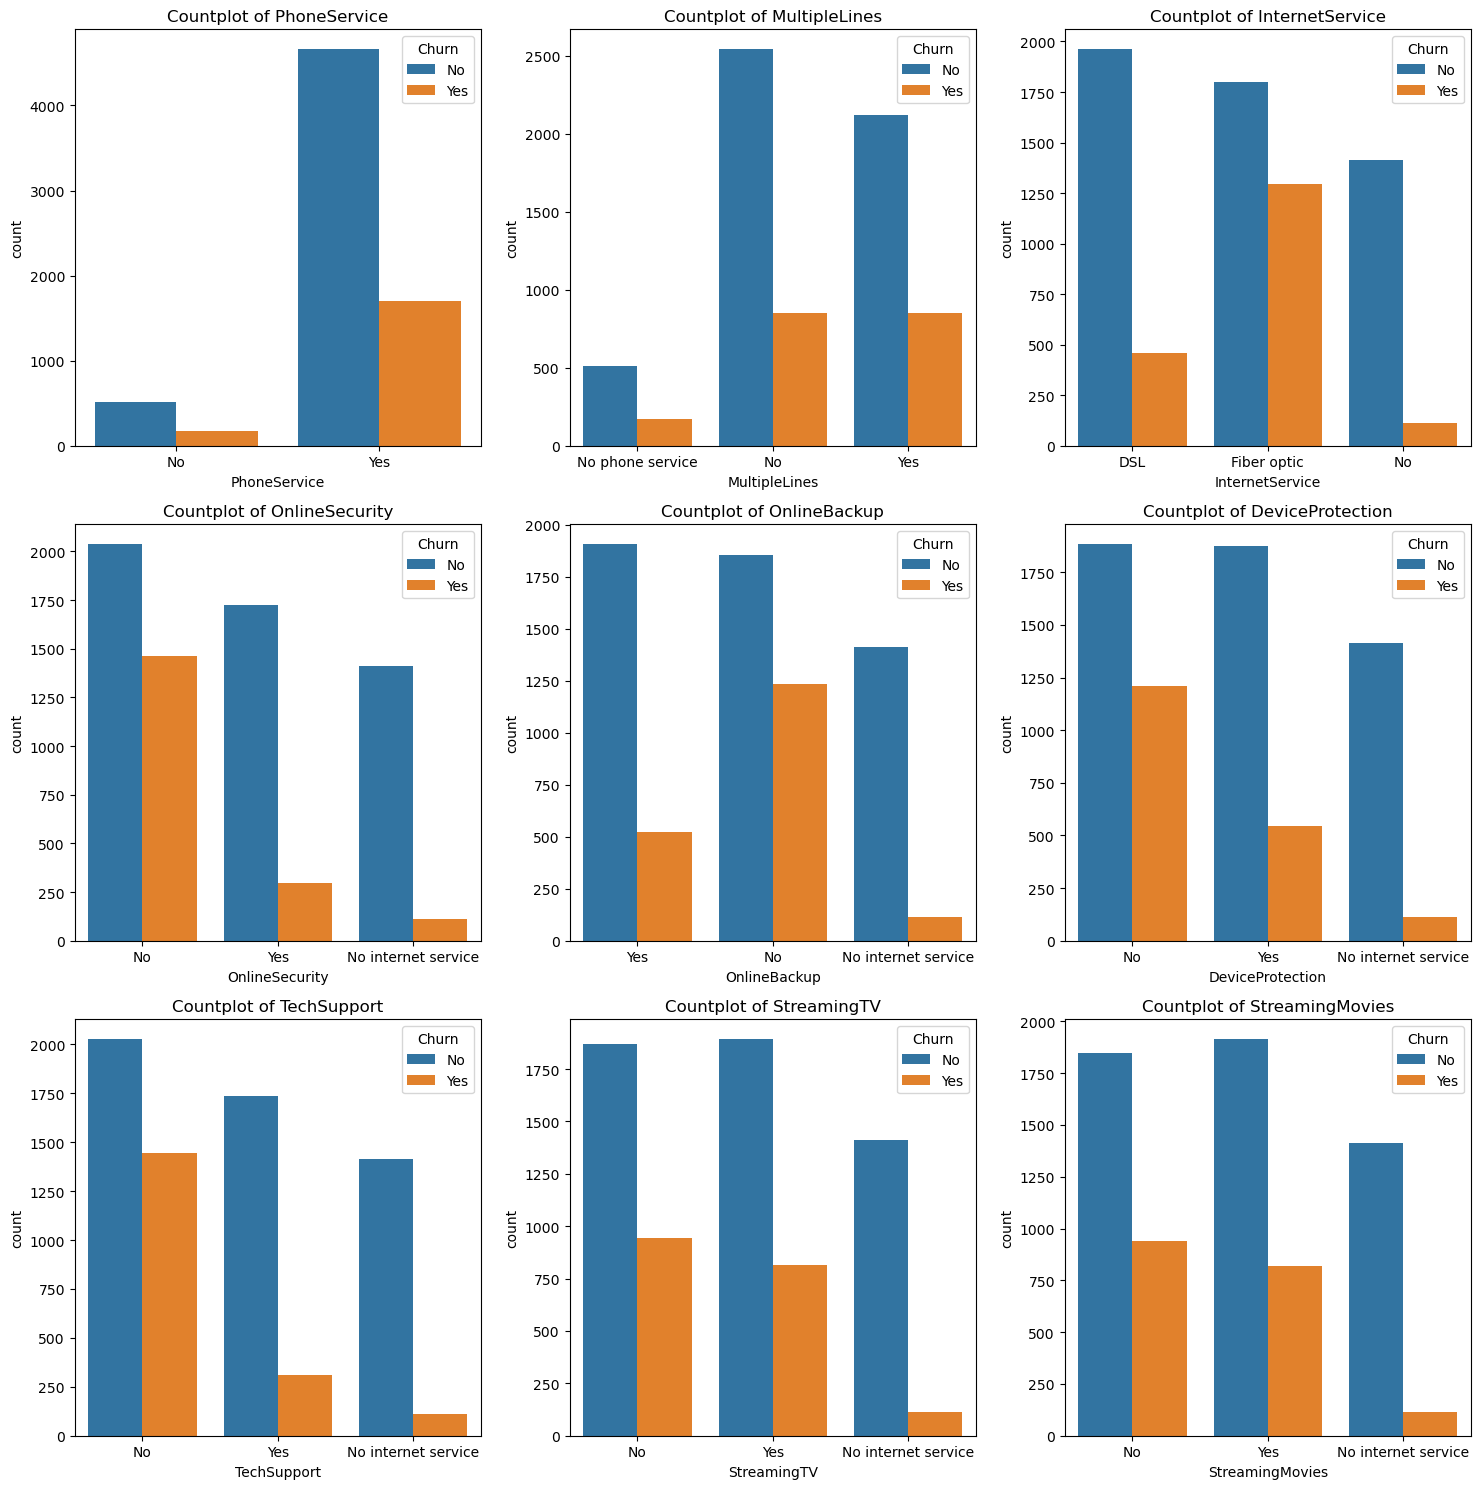

In [102]:
# List of columns to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows and 3 columns, because we have 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each column and create a countplot on the corresponding axis
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Countplot of {column}')  # Set the title for each subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

##### The visualizations present count plots showing customer churn (Yes or No) across various service features such as PhoneService, MultipleLines, InternetService, and Online Security. The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable.

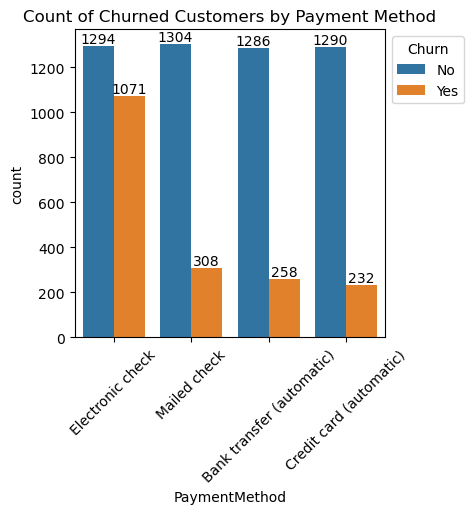

In [106]:
plt.figure(figsize=(4,4))
ax3 = sns.countplot(data=df, x='PaymentMethod', hue="Churn")
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
plt.title("Count of Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1,1))
plt.show()

##### Customers are likely to churn when they are using electronic check as a payment method.